In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

pandas2ri.activate()

robjects.r('data(PlantGrowth)')
plant_growth_r_df = robjects.r('as.data.frame(PlantGrowth)')

plant_growth_df = pd.DataFrame(plant_growth_r_df)

plant_growth_df = pd.DataFrame({'weight': weights, 'group': groups})

plant_growth_df.head()



,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


# Assumption 4

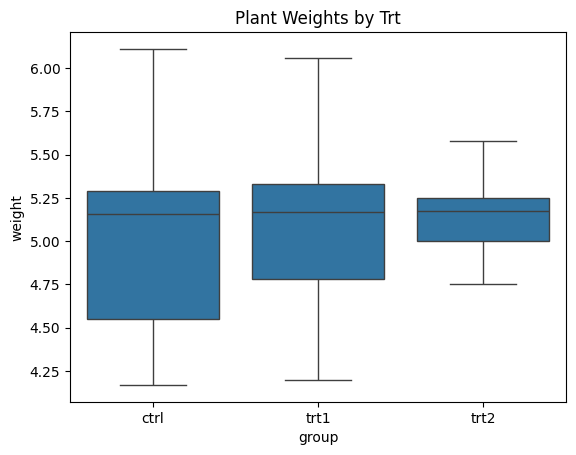

In [8]:
sns.boxplot(x='group', y='weight', data=plant_growth_df)
plt.title('Plant Weights by Trt')
plt.show()

# Assumption 5

In [22]:
from IPython.display import display

descriptive_measures = {}
for group_name, group_data in plant_growth_df.groupby('group')['weight']:
    n = group_data.count()  
    descriptive_measures[group_name] = {
        'Valid': n,
        'Mode': group_data.mode().tolist(),
        'Median': group_data.median(),
        'Mean': group_data.mean(),
        'Std. Deviation': group_data.std(),
        'Variance': group_data.var(),
        'Skewness': group_data.skew(),
        'Std. Error of Skewness': np.sqrt(((6)*(n)*(n-1))/((n-2)*(n+1)*(n+3))),
        'Kurtosis': group_data.kurt(),
        'Std. Error of Kurtosis': np.sqrt(24 / n),
        'Minimum': group_data.min(),
        'Maximum': group_data.max(),
        '25th Percentile': group_data.quantile(0.25),
        '50th Percentile': group_data.quantile(0.50),
        '90th Percentile': group_data.quantile(0.90),
    }

descriptive_stats_df = pd.DataFrame(descriptive_measures)


print("Descriptive Statistics:")
display(descriptive_stats_df)


normality_results = {}
for group in plant_growth_df['group'].unique():
    stat, p = stats.shapiro(plant_growth_df[plant_growth_df['group'] == group]['weight'])
    normality_results[group] = p 

print("\n\nNormality Test Results (Shapiro-Wilk p-values):")
for group, p_value in normality_results.items():
    print(f"{group}: p-value = {p_value:.4f}")

Descriptive Statistics:


,ctrl,trt1,trt2
Valid,10,10,10
Mode,"[4.17, 4.5, 4.53, 4.61, 5.14, 5.17, 5.18, 5.33...","[4.2, 4.32, 4.75, 4.88, 5.16, 5.18, 5.27, 5.35...",[5.0]
Median,5.155,5.17,5.175
Mean,5.032,5.065,5.144
Std. Deviation,0.583091,0.552213,0.231862
Variance,0.339996,0.304939,0.05376
Skewness,0.320975,-0.006273,0.184911
Std. Error of Skewness,0.687043,0.687043,0.687043
Kurtosis,-0.229125,0.114014,0.473919
Std. Error of Kurtosis,1.549193,1.549193,1.549193




Normality Test Results (Shapiro-Wilk p-values):
ctrl: p-value = 0.7475
trt1: p-value = 0.8235
trt2: p-value = 0.8985


# Assumption 6

In [18]:
stat, p_value = stats.levene(
    plant_growth_df[plant_growth_df['group'] == 'ctrl']['weight'],
    plant_growth_df[plant_growth_df['group'] == 'trt1']['weight'],
    plant_growth_df[plant_growth_df['group'] == 'trt2']['weight']
)

print("\nHomogeneity of Variances (Levene's test):")
print(f"Levene Statistic: {stat:.4f}, p-value: {p_value:.4f}")


Homogeneity of Variances (Levene's test):
Levene Statistic: 2.0301, p-value: 0.1509


# Computations

In [19]:
anova_results = stats.f_oneway(
    plant_growth_df[plant_growth_df['group'] == 'ctrl']['weight'],
    plant_growth_df[plant_growth_df['group'] == 'trt1']['weight'],
    plant_growth_df[plant_growth_df['group'] == 'trt2']['weight']
)

print("\nOne-Way ANOVA Results:")
print(f"F-statistic: {anova_results.statistic:.4f}, p-value: {anova_results.pvalue:.4f}")


One-Way ANOVA Results:
F-statistic: 0.1422, p-value: 0.8681
